In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/upflairs-pvt-ltd/1st_june_data_science/master/insurance/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.columns  =  ['age', 'gender', 'bmi', 'child', 'smoker', 'region', 'charges']

In [10]:
df.head()

,age,gender,bmi,child,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [14]:
df['charges'].min()

1121.8739

In [15]:
df['charges'].max()

63770.42801

In [16]:
df['charges'].mean()


13270.422265141257

In [18]:
female = df[df['gender'] == "female"]
male = df[df['gender'] == "male"]


In [19]:
print("Total female person : ",female.shape[0])
print("Total male person : ",male.shape[0])


Total female person :  662
Total male person :  676


In [21]:
df['child'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [22]:
df['child'].value_counts()

child
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [24]:
print(female['charges'].min())
print(female['charges'].max())
print(female['charges'].mean())


1607.5101
63770.42801
12569.578843835347


In [25]:
print(male['charges'].min())
print(male['charges'].max())
print(male['charges'].mean())

1121.8739
62592.87309
13956.751177721893


In [27]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [29]:
df['child'].value_counts()


child
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

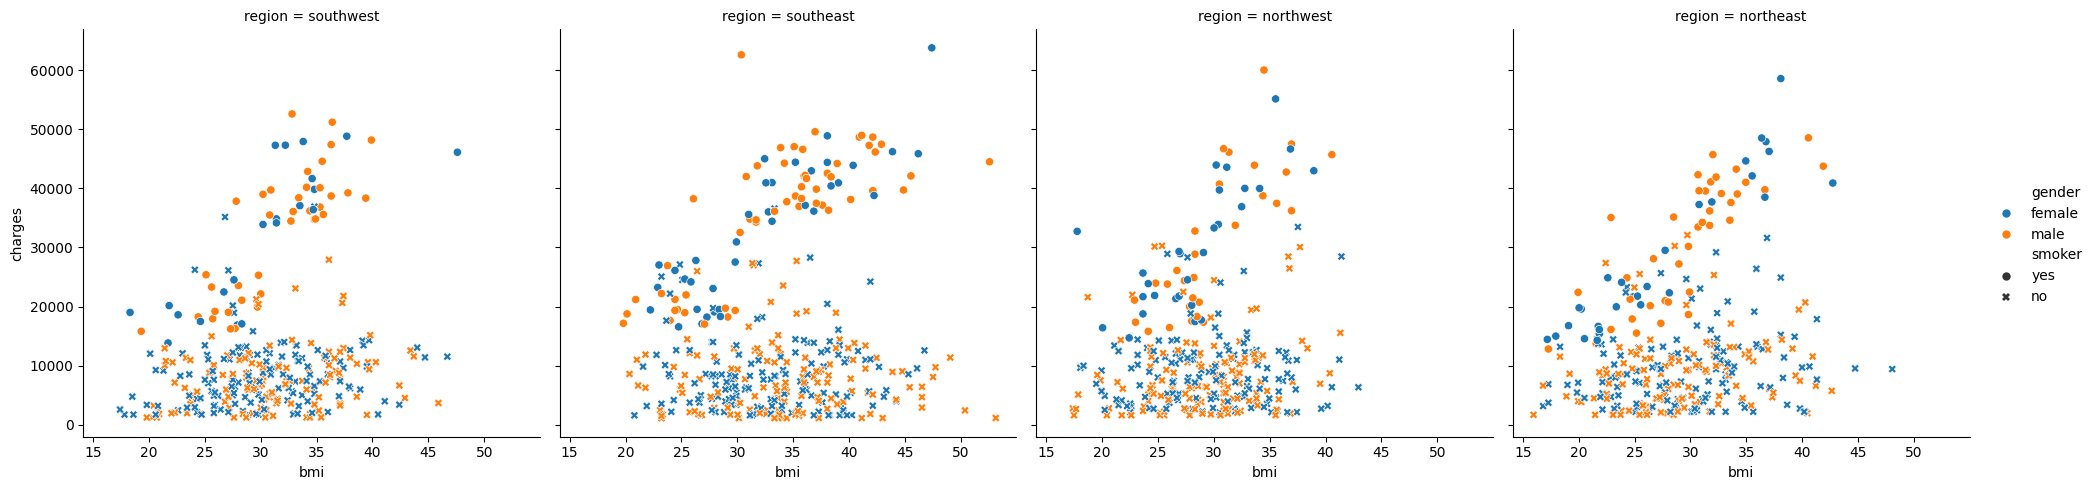

In [32]:
sns.relplot(x='bmi',y='charges',hue='gender',style='smoker',data=df,col='region')
plt.show()

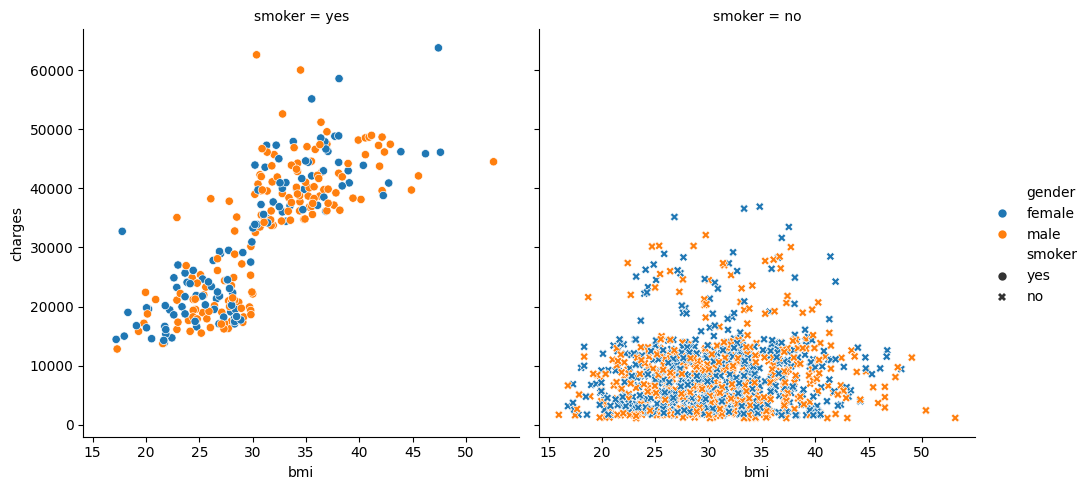

In [36]:
sns.relplot(x='bmi',y='charges',hue='gender',style='smoker',data=df,col='smoker')
plt.show()

In [39]:
child_group = df.groupby('child')
child_record = child_group['charges'].agg(min_price='min',max_price='max',avg_price='mean')
child_record

,min_price,max_price,avg_price
child,,,
0,1121.8739,63770.42801,12365.975602
1,1711.0268,58571.07448,12731.171832
2,2304.0022,49577.66240,15073.563734
3,3443.0640,60021.39897,15355.318367
4,4504.6624,40182.24600,13850.656311
5,4687.7970,19023.26000,8786.035247


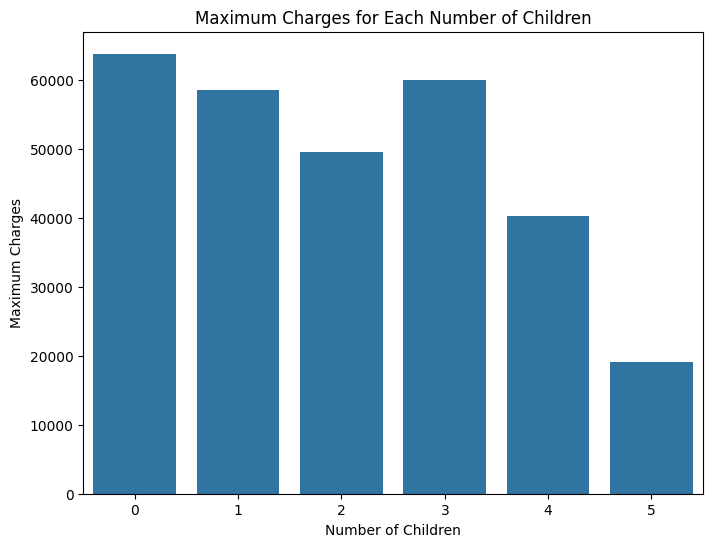

In [40]:
max_charges = df.groupby('child')['charges'].max().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='child', y='charges', data=max_charges)
plt.title('Maximum Charges for Each Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Maximum Charges')
plt.show()
